In [26]:
# Import Relevant Data Sets
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [2]:
df_raw = pd.read_csv('Maternal Health Risk Data Set.csv')
df_raw.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
# Check the data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


* There are no missing values in the rows
* All features are of the right types
* We need to check RiskLevel
* We need to convert the RiskLevel to a categorical type

In [4]:
df_raw['RiskLevel'] = df_raw['RiskLevel'].astype('category')
print(df_raw.dtypes)
df_raw['BodyTemp'] = df_raw['BodyTemp'].astype(np.float64)
df_raw['BS'] = df_raw['BS'].astype(np.float64)

Age               int64
SystolicBP        int64
DiastolicBP       int64
BS              float64
BodyTemp        float64
HeartRate         int64
RiskLevel      category
dtype: object


In [5]:
df_raw['RiskLevel'].unique()

['high risk', 'low risk', 'mid risk']
Categories (3, object): ['high risk', 'low risk', 'mid risk']

* The RiskLevel is the target and it will be converted to numerical values later on.

In [6]:
df_raw.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


* Checking the data, some values looks like an anomaly hence we must study the data more closely to know if there are outliers
* Next we check the distribution of the RiskLevel Class

In [7]:
# Checking RiskLevel Counts
df_raw['RiskLevel'].value_counts(normalize=True) * 100

RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: proportion, dtype: float64

* We see that the data the percentage of high risk in RiskLevel is the lowest. 

# Checking For Outliers

In [8]:
# Checking the HeartRate column
df_raw[df_raw['HeartRate']<=40]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


In [9]:
# Checking the BodyTemp column
df_raw[df_raw['BodyTemp']>=100]['RiskLevel'].value_counts(normalize=True)

RiskLevel
mid risk     0.446701
high risk    0.355330
low risk     0.197970
Name: proportion, dtype: float64

In [10]:
# Checking the SystolicBP column
df_raw[df_raw['SystolicBP'] >120]['RiskLevel'].value_counts(normalize=True)

RiskLevel
high risk    0.721649
mid risk     0.273196
low risk     0.005155
Name: proportion, dtype: float64

In [11]:
# Checking the BS column
df_raw[df_raw['BS'] >12]['RiskLevel'].value_counts(normalize=True)

RiskLevel
high risk    0.867647
mid risk     0.132353
low risk     0.000000
Name: proportion, dtype: float64

In [12]:
# Checking the BS column
df_raw[df_raw['Age'] <=12]['RiskLevel'].value_counts(normalize=True)

RiskLevel
low risk     0.435897
mid risk     0.384615
high risk    0.179487
Name: proportion, dtype: float64

In [13]:
# Checking the SystolicBP column
df_raw[df_raw['DiastolicBP'] >80]['RiskLevel'].value_counts(normalize=True)

RiskLevel
high risk    0.493865
low risk     0.285276
mid risk     0.220859
Name: proportion, dtype: float64

* Observation
* Only the HeartRate column contains an outlier, An heartRate below 40 is not considered normal is a sign of an heart condition but people with a HeartRate of 7bpm in our data has a low risk, hence it must be an outlier

In [14]:
# Remove Outliers
df_raw = df_raw[df_raw['HeartRate'] !=7]

# Exploratory Data Analysis


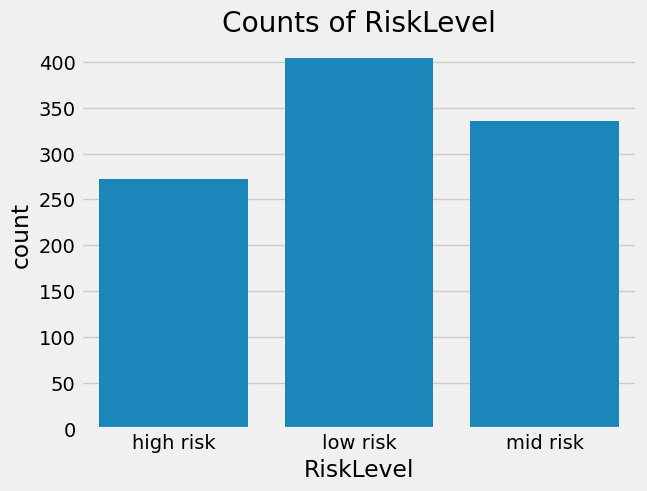

In [15]:
# Check the distribution of RiskLevel
sns.countplot(x='RiskLevel', data=df_raw)
plt.title("Counts of RiskLevel")
plt.show()

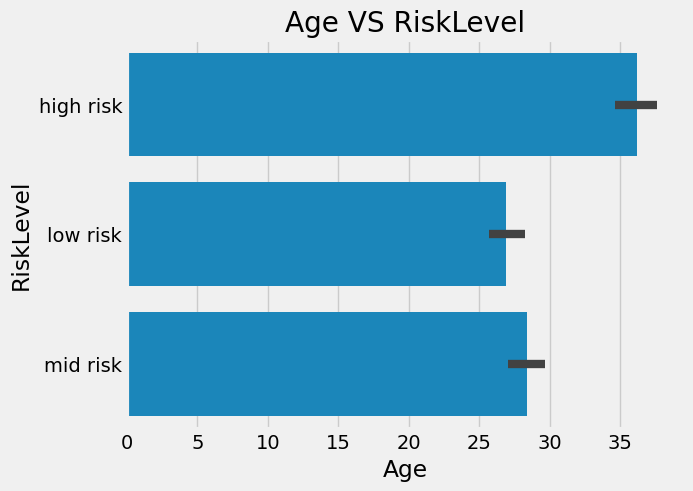

In [16]:
# Next we check which how the risk level change with age
sns.barplot(y='RiskLevel',x='Age',data=df_raw)
plt.title("Age VS RiskLevel")
plt.show()

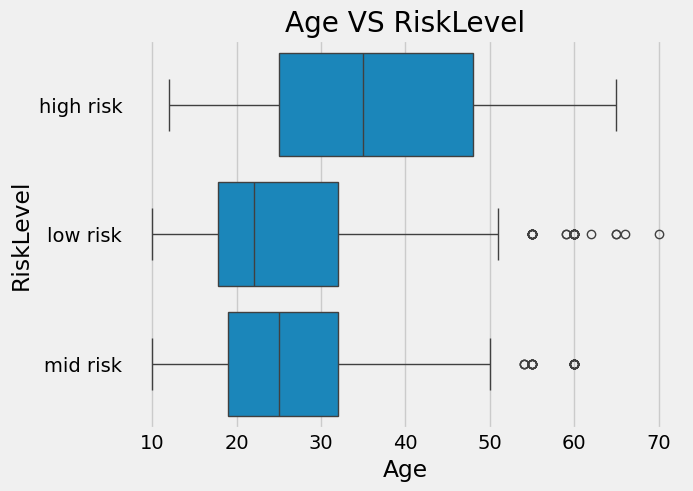

In [17]:
sns.boxplot(y='RiskLevel',x='Age',data=df_raw)
plt.title("Age VS RiskLevel")
plt.show()

* It can seen that on average, the risk level increase with age

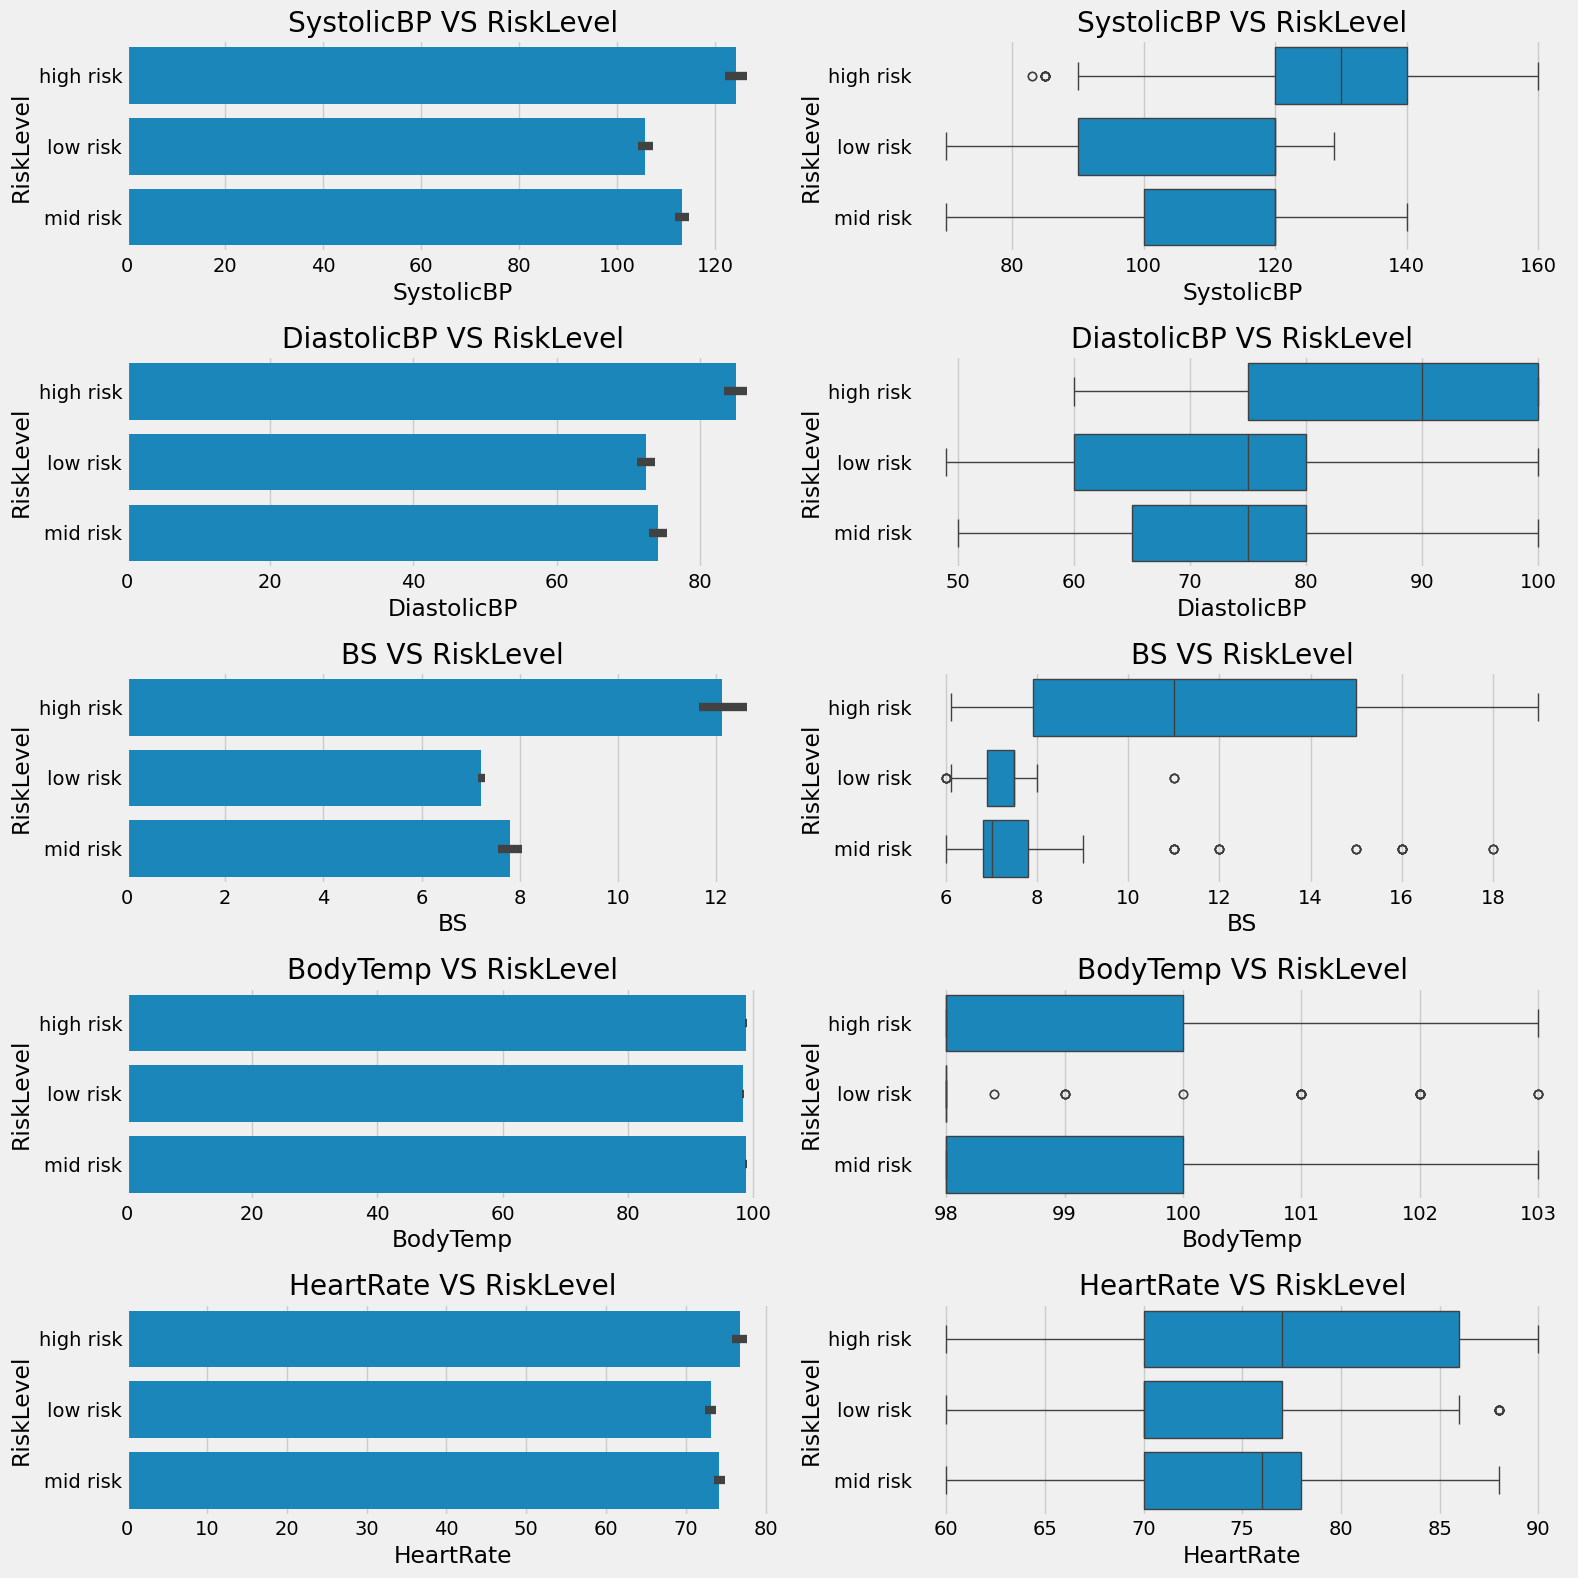

In [18]:
fig, axes = plt.subplots(5, 2, figsize=(16,16))
sns.barplot(y='RiskLevel',x='SystolicBP',data=df_raw, ax=axes[0,0])
axes[0,0].set_title("SystolicBP VS RiskLevel")
sns.boxplot(y='RiskLevel',x='SystolicBP',data=df_raw,ax=axes[0,1])
axes[0,1].set_title("SystolicBP VS RiskLevel")
sns.barplot(y='RiskLevel',x='DiastolicBP',data=df_raw, ax=axes[1,0])
axes[1,0].set_title("DiastolicBP VS RiskLevel")
sns.boxplot(y='RiskLevel',x='DiastolicBP',data=df_raw, ax=axes[1,1])
axes[1,1].set_title("DiastolicBP VS RiskLevel")
sns.barplot(y='RiskLevel',x='BS',data=df_raw, ax=axes[2,0])
axes[2,0].set_title("BS VS RiskLevel")
sns.boxplot(y='RiskLevel',x='BS',data=df_raw, ax=axes[2,1])
axes[2,1].set_title("BS VS RiskLevel")
sns.barplot(y='RiskLevel',x='BodyTemp',data=df_raw, ax=axes[3,0])
axes[3,0].set_title("BodyTemp VS RiskLevel")
sns.boxplot(y='RiskLevel',x='BodyTemp',data=df_raw, ax=axes[3,1])
axes[3,1].set_title("BodyTemp VS RiskLevel")
sns.barplot(y='RiskLevel',x='HeartRate',data=df_raw, ax=axes[4,0])
axes[4,0].set_title("HeartRate VS RiskLevel")
sns.boxplot(y='RiskLevel',x='HeartRate',data=df_raw, ax=axes[4,1])
axes[4,1].set_title("HeartRate VS RiskLevel")
plt.tight_layout()
plt.show()

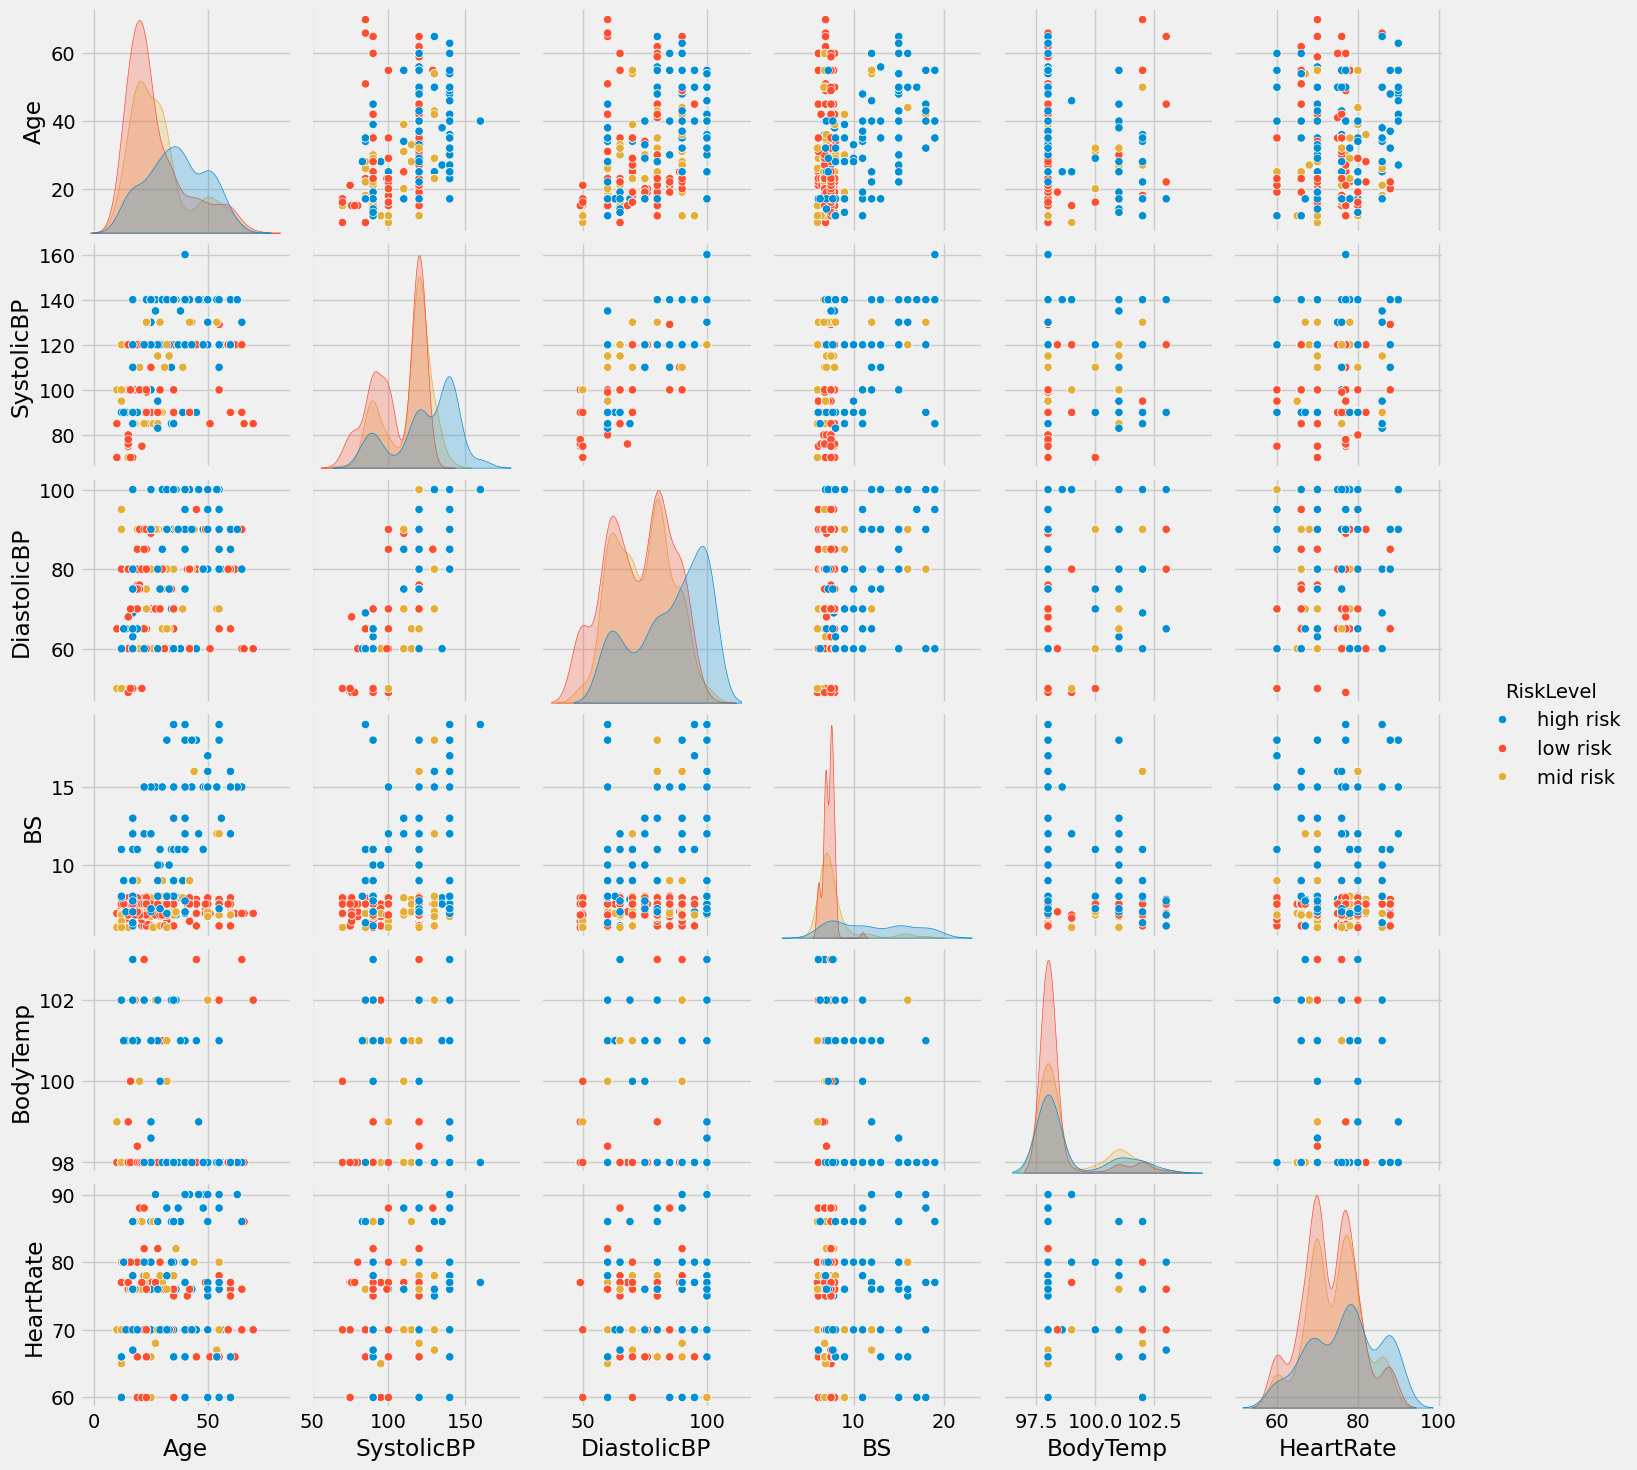

In [19]:
sns.pairplot(data=df_raw, hue='RiskLevel')
plt.show()

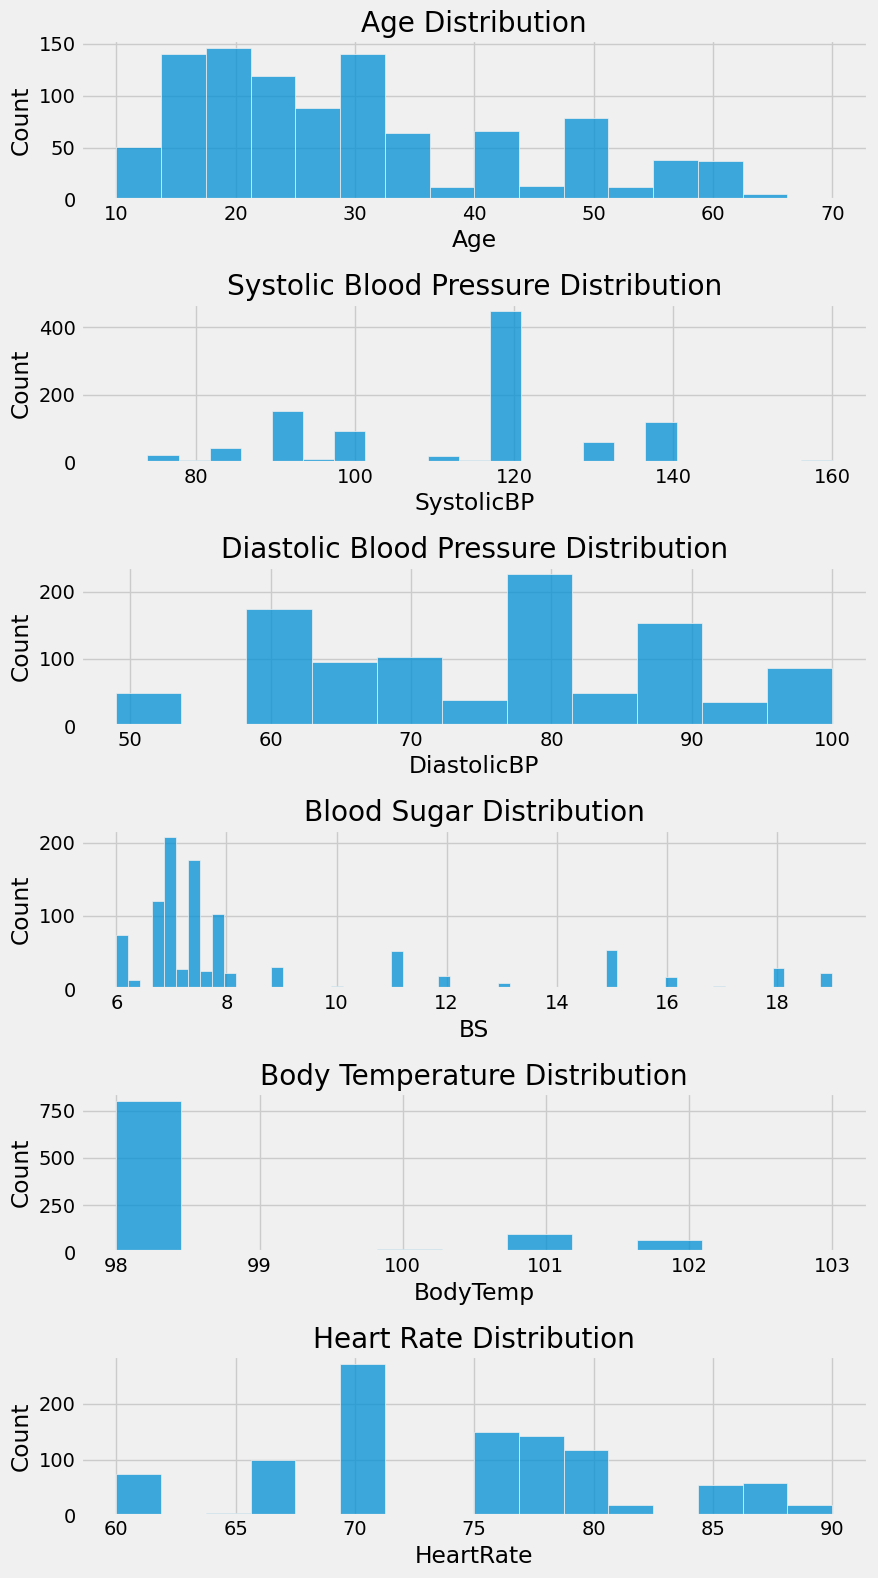

In [20]:
fig, axes = plt.subplots(6, 1, figsize=(9,16))
# Create plots
sns.histplot(df_raw['Age'], ax=axes[0])
sns.histplot(df_raw['SystolicBP'], ax=axes[1])
sns.histplot(df_raw['DiastolicBP'], ax=axes[2])
sns.histplot(df_raw['BS'], ax=axes[3])
sns.histplot(df_raw['BodyTemp'], ax=axes[4])
sns.histplot(df_raw['HeartRate'], ax=axes[5])
# Add titles
axes[0].set_title("Age Distribution")
axes[1].set_title("Systolic Blood Pressure Distribution")
axes[2].set_title("Diastolic Blood Pressure Distribution")
axes[3].set_title("Blood Sugar Distribution")
axes[4].set_title("Body Temperature Distribution")
axes[5].set_title("Heart Rate Distribution")
plt.tight_layout()
plt.show()

**Note** : The target is still a category, we have to change it to a numerical value to be able to use it in the model

In [21]:
# Changing the RiskLevel to a numerical Variable
# Replace High Risk by 2
df_raw['RiskLevel'] = df_raw['RiskLevel'].replace('high risk',2)
# Replace Mid Risk by 1
df_raw['RiskLevel'] = df_raw['RiskLevel'].replace('mid risk',1)
# Replace Low Risk by 0
df_raw['RiskLevel'] = df_raw['RiskLevel'].replace('low risk',0)
# Print first 5 rows
df_raw.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


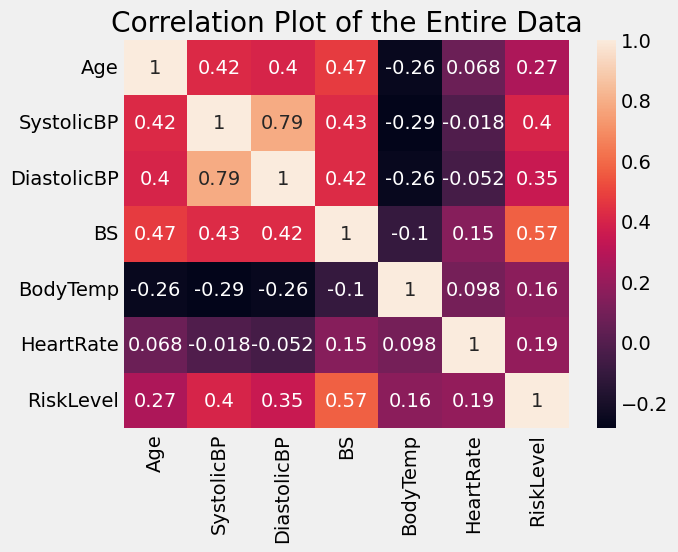

In [22]:
# Convert the RiskLevel to the integer type
df_raw['RiskLevel'] = df_raw['RiskLevel'].astype(int)
# Create a correlation Plot of the Data
sns.heatmap(df_raw.corr(), annot=True)
plt.title('Correlation Plot of the Entire Data')
plt.show()

# Data Preprocessing

In [23]:
# Split the target and features
targets = df_raw['RiskLevel']
inputs = df_raw.drop('RiskLevel', axis=1)

In [32]:
# Split Data into train and test set
input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.2, stratify=targets,
                                                                      random_state=42)
# Use StandardScaler on the input data
std_scaler = StandardScaler()
scaled_train_data = std_scaler.fit_transform(input_train)
scaled_test_data = std_scaler.transform(input_test)

In [33]:
# Turn SCaled_data to DataFrame
input_data_scaled = pd.DataFrame(scaled_train_data, columns=input_train.columns)
input_test_data_scaled = pd.DataFrame(scaled_test_data, columns=input_train.columns)
input_data_scaled.to_csv("input_train_data.csv")
target_train.to_csv("target_train_data.csv")
input_test_data_scaled.to_csv("input_data_test.csv")
target_test.to_csv("target_test_data.csv")

In [37]:
def dataFrameCleaner(data):
    """"
    parameter: A dataFrame
    
    
    It cleans the dataset, split it into target and input set, then clean the input data
    
    Return: A tuple containing (input, target)
    """
    data['RiskLevel'] = data['RiskLevel'].astype('category')
    data['BodyTemp'] = data['BodyTemp'].astype(np.float64)
    data['BS'] = data['BS'].astype(np.float64)
    # Changing the RiskLevel to a numerical Variable
    # Replace High Risk by 2
    data['RiskLevel'] = data['RiskLevel'].replace('high risk',2)
    # Replace Mid Risk by 1
    data['RiskLevel'] = data['RiskLevel'].replace('mid risk',1)
    # Replace Low Risk by 0
    data['RiskLevel'] = data['RiskLevel'].replace('low risk',0)
    # Convert the RiskLevel to the integer type
    data['RiskLevel'] = data['RiskLevel'].astype(int)
    targets = data['RiskLevel']
    inputs = data.drop('RiskLevel', axis=1)
    scaled_test_data = std_scaler.transform(inputs)
    return inputs, targets

In [40]:
# Import Pickle
import pickle
# Save the scaler to a file
with open('scaler_filename.pkl', 'wb') as file:
    pickle.dump(std_scaler, file)